**Installing and Importing Libraries:**

In [3]:
!pip install quandl  
import quandl  #Quandl is a platform that provides financial, economic, and alternative data for various applications
import datetime #This imports the standard datetime module, which is used for handling dates and times in Python
import numpy as np #NumPy is a library for numerical computations in Python
import matplotlib.pyplot as plt # Matplotlib is a popular library for creating data visualizations and plots in Python.
import pandas as pd # Pandas is a powerful library for data manipulation and analysis in Python
from pandas import datetime # importing the datetime function from the Pandas library.
from math import sqrt # imports the square root function (sqrt) from the standard Python math module.

     ---------------------------------------- 55.8/55.8 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
C:\Users\durga\AppData\Local\Temp\ipykernel_9260\3734839082.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime # importing the datetime function from the Pandas library.


**Setting Quandl API Key:**

In [4]:
quandl.ApiConfig.api_key = "Api Key from Quandl" # appears to be an attempt to set your Quandl API key

**Fetching Data with Quandl:**

In [5]:
df = quandl.get("NSE/MRF", start_date="2013-01-01", end_date="2018-05-18")

quandl.get: This is a method provided by the Quandl library that allows you to retrieve financial or economic data from the Quandl database.

"NSE/MRF": This is the Quandl code for the specific dataset you want to retrieve. In this case, it appears to be for a stock with the code "NSE/MRF." Quandl organizes its data by codes that correspond to different financial instruments, markets, and sources.

start_date="2013-01-01": This parameter specifies the start date for the data you want to retrieve. In this case, you're starting from January 1, 2013.

end_date="2018-05-18": This parameter specifies the end date for the data you want to retrieve. You're ending on May 18, 2018.

In [6]:
df.head() #show first 5 rows of your dataframe

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2013-01-01,12927.0,13380.00,12879.85,13350.0,13243.25,20619.0,2695.81
2013-01-02,13312.4,13435.00,13256.00,13295.0,13316.20,12217.0,1631.71
2013-01-03,13351.0,13365.95,13124.15,13273.0,13279.10,10213.0,1353.29
2013-01-04,13240.0,13418.40,13221.30,13365.0,13361.10,7307.0,973.81
2013-01-07,13375.0,13439.95,13265.00,13295.0,13288.80,7509.0,1001.57


In [7]:
df.tail()  #show the last 5 rows of your dataframe

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-05-14,74750.0,75152.70,74515.45,74950.00,74737.35,3327.0,2490.00
2018-05-15,74850.0,75599.00,74341.65,74500.00,74604.95,4574.0,3422.04
2018-05-16,74500.0,75098.85,73978.05,74760.90,74873.40,7566.0,5659.91
2018-05-17,74803.4,75276.95,74400.00,74569.85,74559.95,4063.0,3034.76
2018-05-18,74555.0,75509.00,73925.10,74200.00,74206.20,5414.0,4034.38


In [8]:
df.columns # show the columns present in dataframe

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
df.drop(df.columns[[3,5,6]], axis=1, inplace=True)
df.head()  #dropping the columns 3,5,6 (Last,Total Trade Quantity,Turnover (Lacs))

,Open,High,Low,Close
Date,,,,
2013-01-01,12927.0,13380.00,12879.85,13243.25
2013-01-02,13312.4,13435.00,13256.00,13316.20
2013-01-03,13351.0,13365.95,13124.15,13279.10
2013-01-04,13240.0,13418.40,13221.30,13361.10
2013-01-07,13375.0,13439.95,13265.00,13288.80


 divides each value by 100,000.

**Fetching Data with Quandl:**

In [10]:
df['High'] = df['High'] / 100000
df['Open'] = df['Open'] / 100000
df['Low'] = df['Low'] / 100000
df['Close'] = df['Close'] / 100000
print(df.head())
print(df.tail())

                Open      High       Low     Close
Date                                              
2013-01-01  0.129270  0.133800  0.128799  0.132433
2013-01-02  0.133124  0.134350  0.132560  0.133162
2013-01-03  0.133510  0.133660  0.131241  0.132791
2013-01-04  0.132400  0.134184  0.132213  0.133611
2013-01-07  0.133750  0.134400  0.132650  0.132888
                Open      High       Low     Close
Date                                              
2018-05-14  0.747500  0.751527  0.745154  0.747374
2018-05-15  0.748500  0.755990  0.743416  0.746049
2018-05-16  0.745000  0.750989  0.739781  0.748734
2018-05-17  0.748034  0.752769  0.744000  0.745599
2018-05-18  0.745550  0.755090  0.739251  0.742062


**Converting Data to Numpy Array:**

In [11]:
data = df.to_numpy()   #converts the data from the Pandas DataFrame df into a NumPy array

In [12]:
data

array([[0.12927  , 0.1338   , 0.1287985, 0.1324325],
       [0.133124 , 0.13435  , 0.13256  , 0.133162 ],
       [0.13351  , 0.1336595, 0.1312415, 0.132791 ],
       ...,
       [0.745    , 0.7509885, 0.7397805, 0.748734 ],
       [0.748034 , 0.7527695, 0.744    , 0.7455995],
       [0.74555  , 0.75509  , 0.739251 , 0.742062 ]])

**Preparing Data for Model Training:**




In [13]:
result = []    #This is an empty Python list that will be used to store sequences of data.
sequence_length = 6  # This variable is set to 6, indicating the length of sequences you want to create from your data.
for index in range(len(data) - sequence_length):
    result.append(data[index: index + sequence_length])
    #This loop iterates over the range of indices from 0 to the length of the data array minus sequence_length. It creates sequences of length sequence_length from your data and appends these sequences to the result list.

result = np.array(result)
#converts the result list, which contains sequences of data, into a NumPy array.

row = round(0.8 * result.shape[0])
#row, which is set to approximately 80% of the total number of sequences in the result array. This is likely being done to split the data into training and testing sets, where 80% of the data will be used for training and the remaining 20% for testing.
#creating training data
train = result[:int(row), :]
#This line creates a variable train by selecting the first row sequences from the result array. This will be used as the training data.
x_train = train[:, :-1]    #x_train is created by selecting all columns except the last one.  it represent the input features for your model.
y_train = train[:, -1][:,-1]   #y_train select last column train array for predict
x_test = result[int(row):, :-1]  #x_test represents the input features for testing
y_test = result[int(row):, -1][:,-1] #epresents the corresponding target values


#Reshaping Data for LSTM Model:


amount_of_features = len(df.columns) #calculates the number of features (columns)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

print("X_train", x_train.shape)
print("y_train", y_train.shape)
print("X_test", x_test.shape)
print("y_test", y_test.shape)

X_train (1060, 5, 4)
y_train (1060,)
X_test (265, 5, 4)
y_test (265,)


this  code is preparing financial data for training and testing a machine learning model, likely an RNN or a similar sequence-based model, by creating sequences of data and splitting them into training and testing sets. It also reshapes the data to meet the input requirements of the chosen model.

In [15]:
import math #mathematical functions and constants.
#importing keras modules
from keras.models import Sequential  #Sequential is a container for linear stack of layers, which you can add one by one to build a neural network model.
from keras.layers import Dense, Activation ,Dropout , Flatten , Conv1D ,MaxPooling1D #import various layer types
from tensorflow.keras.layers import LSTM # Long Short-Term Memory (LSTM) layer from TensorFlow's Keras module.
from keras import losses

Imports the losses module from Keras, which contains various loss functions that can be used to measure the difference between model predictions and actual target values during training. Loss functions are essential for training neural networks as they guide the optimization process.

**Building an LSTM Model:**

In [16]:
from keras import optimizers
def build_model(layers):  #function take one argument
        d = 0.2  #variable d and sets it to 0.2.
        model = Sequential() #line initializes an empty sequential model.
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(LSTM(32, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16, activation="relu", kernel_initializer="uniform"))
        #model.add(Dropout(d))
        model.add(Dense(1, activation="relu", kernel_initializer="uniform"))
        model.compile(loss='mse',optimizer='adam',metrics=['mae'])
        return model

code defines a neural network model with two LSTM layers, dropout for regularization, and two dense layers for regression tasks. It uses the mean squared error as the loss function and the Adam optimizer for training. The function build_model allows you to create such a model by specifying the number of features and the sequence length as input arguments.

**Model Training:**

In [17]:
model = build_model([4,5,1])
#Summary of the Model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            68096     
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 89249 (348.63 KB)
Trainable params: 89249 (348.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


display a summary of your neural network model in the console, which can be very helpful for understanding the architecture and ensuring that it matches your intended design. This summary will provide details about the LSTM layers

In [18]:
from timeit import default_timer as timer
start = timer()
history = model.fit(x_train,
                    y_train,
                    batch_size=128,
                    epochs=25,
                    validation_split=0.2,
                    verbose=2)
end = timer()
print(end - start)

Epoch 1/25
7/7 - 5s - loss: 0.0827 - mae: 0.2679 - val_loss: 0.2149 - val_mae: 0.4557 - 5s/epoch - 681ms/step
Epoch 2/25
7/7 - 0s - loss: 0.0727 - mae: 0.2494 - val_loss: 0.1803 - val_mae: 0.4167 - 151ms/epoch - 22ms/step
Epoch 3/25
7/7 - 0s - loss: 0.0498 - mae: 0.2007 - val_loss: 0.0906 - val_mae: 0.2923 - 144ms/epoch - 21ms/step
Epoch 4/25
7/7 - 0s - loss: 0.0116 - mae: 0.0866 - val_loss: 0.0060 - val_mae: 0.0687 - 134ms/epoch - 19ms/step
Epoch 5/25
7/7 - 0s - loss: 0.0106 - mae: 0.0863 - val_loss: 0.0196 - val_mae: 0.1226 - 121ms/epoch - 17ms/step
Epoch 6/25
7/7 - 0s - loss: 0.0056 - mae: 0.0643 - val_loss: 0.0386 - val_mae: 0.1843 - 113ms/epoch - 16ms/step
Epoch 7/25
7/7 - 0s - loss: 0.0055 - mae: 0.0627 - val_loss: 0.0216 - val_mae: 0.1323 - 124ms/epoch - 18ms/step
Epoch 8/25
7/7 - 0s - loss: 0.0037 - mae: 0.0525 - val_loss: 0.0106 - val_mae: 0.0864 - 142ms/epoch - 20ms/step
Epoch 9/25
7/7 - 0s - loss: 0.0029 - mae: 0.0461 - val_loss: 0.0151 - val_mae: 0.1105 - 144ms/epoch - 21ms

it will train your model for 25 epochs using the specified batch size, and it will display training progress and metrics as it goes. After training is complete, it will print the total time taken for the training process. This can be useful for measuring the training time, especially when working with larger datasets and more complex models.

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [20]:

plt.style.use('dark_background') #'dark_background': This style sets a dark background with contrasting colors for your plots


C:\Users\durga\AppData\Local\Temp\ipykernel_9260\3687018039.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
C:\Users\durga\AppData\Local\Temp\ipykernel_9260\3687018039.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')


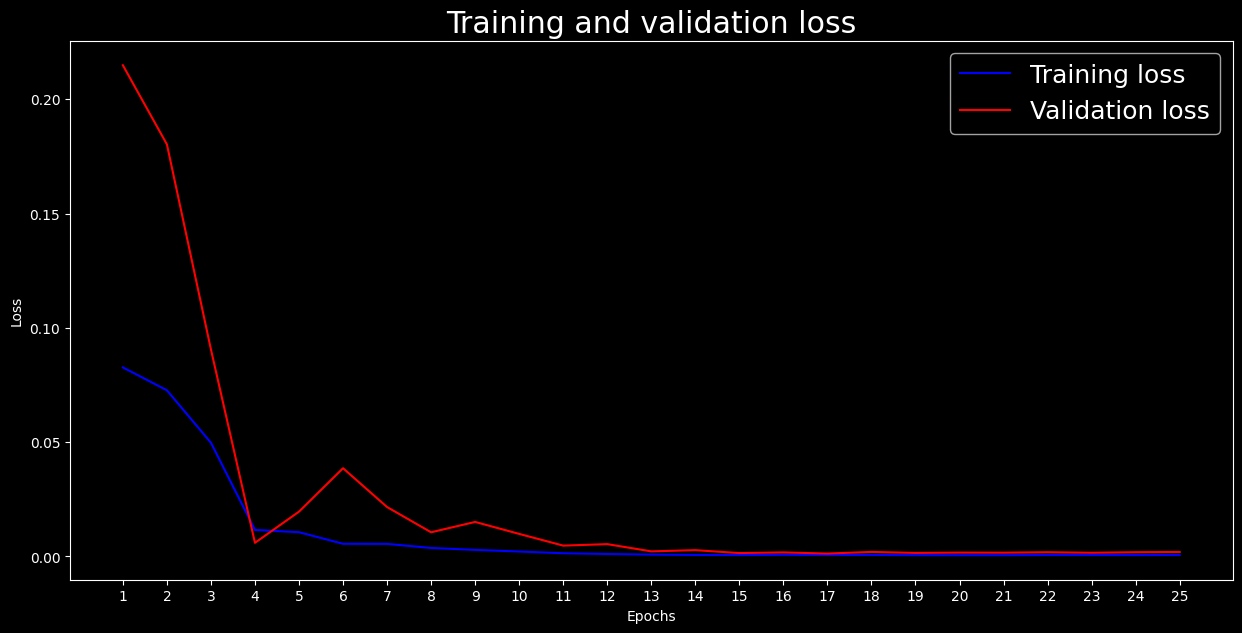

In [21]:


import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
loss_values50 = loss_values[0:150]
val_loss_values50 = val_loss_values[0:150]
epochs = range(1, len(loss_values50) + 1)
plt.plot(epochs, loss_values50, 'b',color = 'blue', label='Training loss')
plt.plot(epochs, val_loss_values50, 'b',color='red', label='Validation loss')
plt.rc('font', size = 18)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)

plt.show()

plot showing the training loss and validation loss over the specified epochs, with the specified formatting and labels.

C:\Users\durga\AppData\Local\Temp\ipykernel_9260\3224748998.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
C:\Users\durga\AppData\Local\Temp\ipykernel_9260\3224748998.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, vmae, 'b',color='red', label='Validation error')


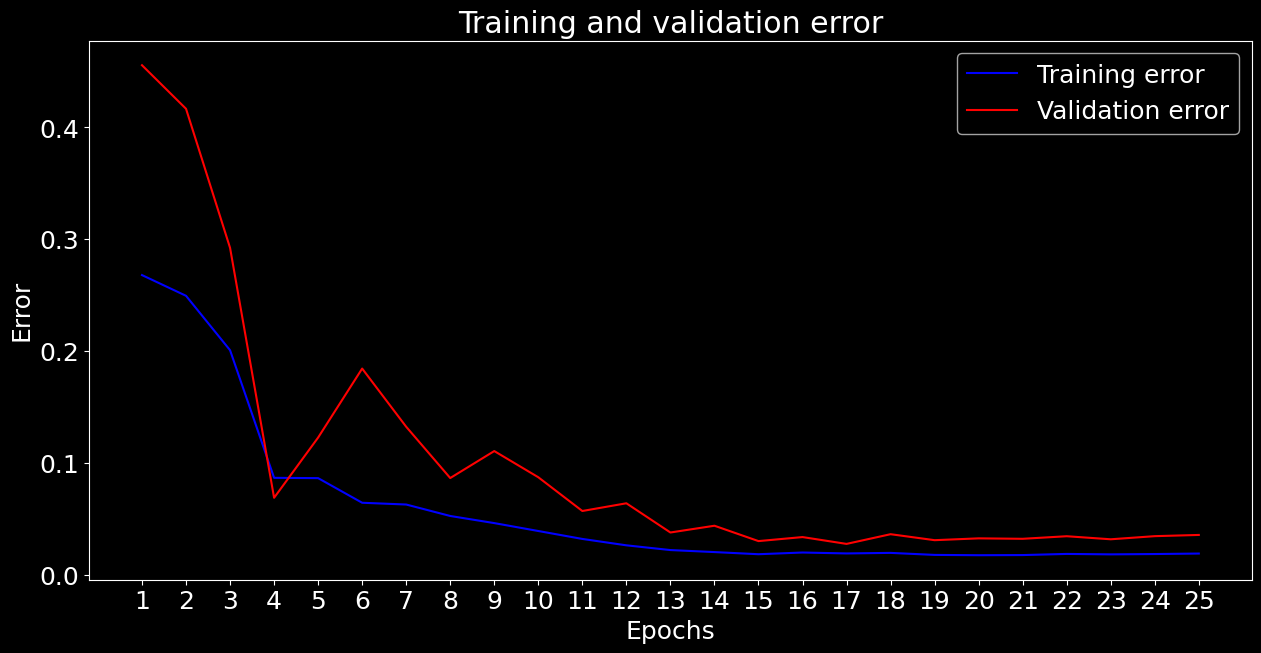

In [22]:
mae = history_dict['mae']
vmae = history_dict['val_mae']
epochs = range(1, len(mae) + 1)
plt.plot(epochs, mae, 'b',color = 'blue', label='Training error')
plt.plot(epochs, vmae, 'b',color='red', label='Validation error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.xticks(epochs)
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.show()

it will generate a line plot showing the training error (MAE) and validation error (MAE) over the specified epochs, with the specified formatting and labels. This can help you visualize how well your model is performing in terms of error reduction during training and validation.






In [23]:
model.metrics_names

['loss', 'mae']

attribute returns a list of the names of the metrics

**Evaluating Model Performance:**

In [24]:
trainScore = model.evaluate(x_train, y_train, verbose=0) # calculates the model's performance metrics on the training dataset
testScore = model.evaluate(x_test, y_test, verbose=0) # caculates the model's performance metrics on the testing dataset

In [25]:
#predicting values for y_test
p = model.predict(x_test)

9/9 [==============================] - 1s 3ms/step


**Plotting Predictions:**

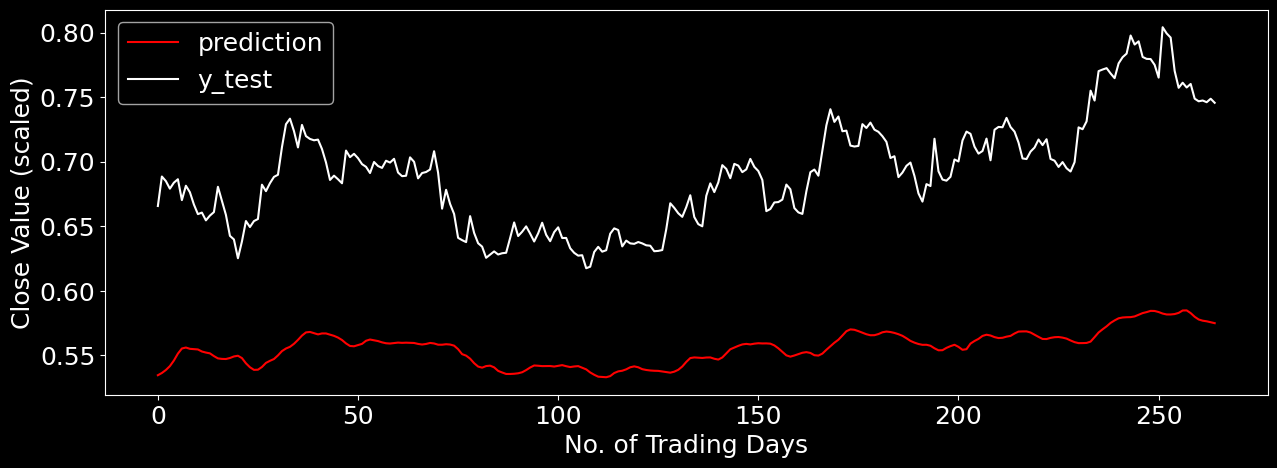

In [36]:
plt.plot(p,color='red', label='prediction')
plt.plot(y_test,color='white', label='y_test')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.show()

it  generate a line plot showing the predicted values (in red) and the actual values (y_test, in blue) for a sequence data

In [27]:
p1= model.predict(x_train)

 1/34 [..............................] - ETA: 0s

34/34 [==============================] - 0s 4ms/step


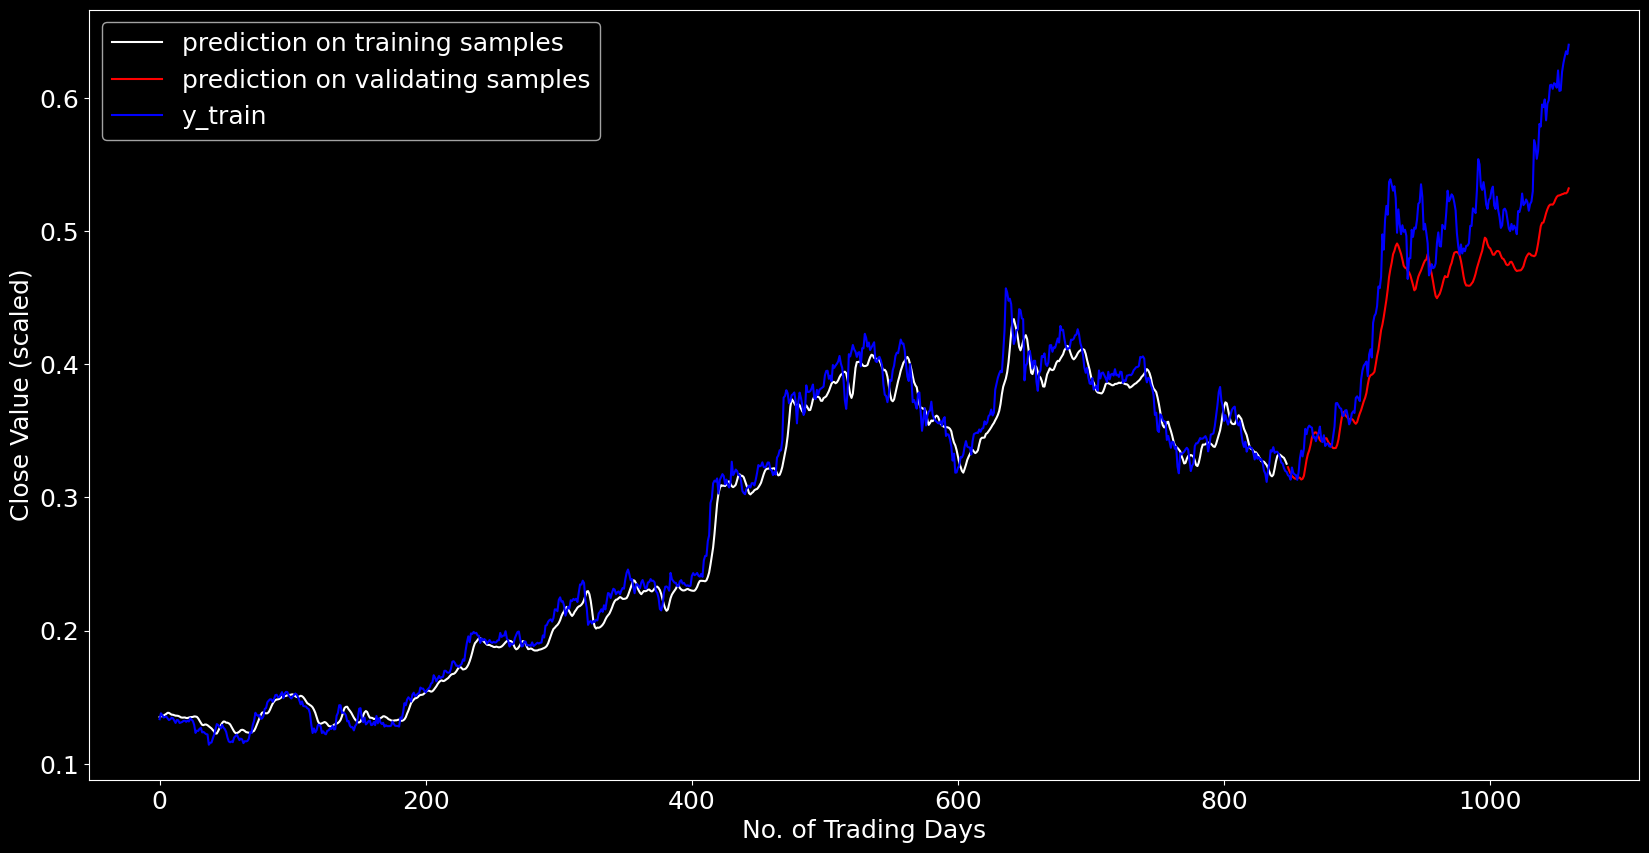

In [29]:
plt.plot(p1[:848],color='white', label='prediction on training samples')
x = np.array(range(848,1060))
plt.plot(x,p1[848:],color = 'red',label ='prediction on validating samples')
plt.plot(y_train,color='blue', label='y_train')
plt.xlabel('No. of Trading Days')
plt.ylabel('Close Value (scaled)')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

it  generate a line plot showing the model's predictions on both the training and validation data, as well as the actual training data.

**Scaling Back Data:**

In [30]:
y = y_test * 100000 #by multiplying them by 100,000.
y_pred = p.reshape(265) #reshapes the predicted values
y_pred = y_pred * 100000 #multiplying them by 100000

**Calculating Metrics:**

In [31]:
from sklearn.metrics import mean_absolute_error

**Printing Evaluation Metrics:**

In [32]:
print('Trainscore RMSE \tTrain Mean abs Error \tTestscore Rmse \t Test Mean abs Error')
print('%.9f \t\t %.9f \t\t %.9f \t\t %.9f' % (math.sqrt(trainScore[0]),trainScore[1],math.sqrt(testScore[0]),testScore[1]))

Trainscore RMSE 	Train Mean abs Error 	Testscore Rmse 	 Test Mean abs Error
0.022522448 		 0.014173924 		 0.138498245 		 0.134978354


it will print a table showing the RMSE and MAE for both the training and testing datasets in a formatted

**Printing Additional Metrics:**



In [33]:
print('mean absolute error \t mean absolute percentage error')
print(' %.9f \t\t\t %.9f' % (mean_absolute_error(y,y_pred),(np.mean(np.abs((y - y_pred) / y)) * 100)))

mean absolute error 	 mean absolute percentage error
 13497.836200857 			 19.338170448


it will print a table showing the MAE and MAPE, providing insights into the accuracy of your model's predictions in both absolute terms and as a percentage of the actual values

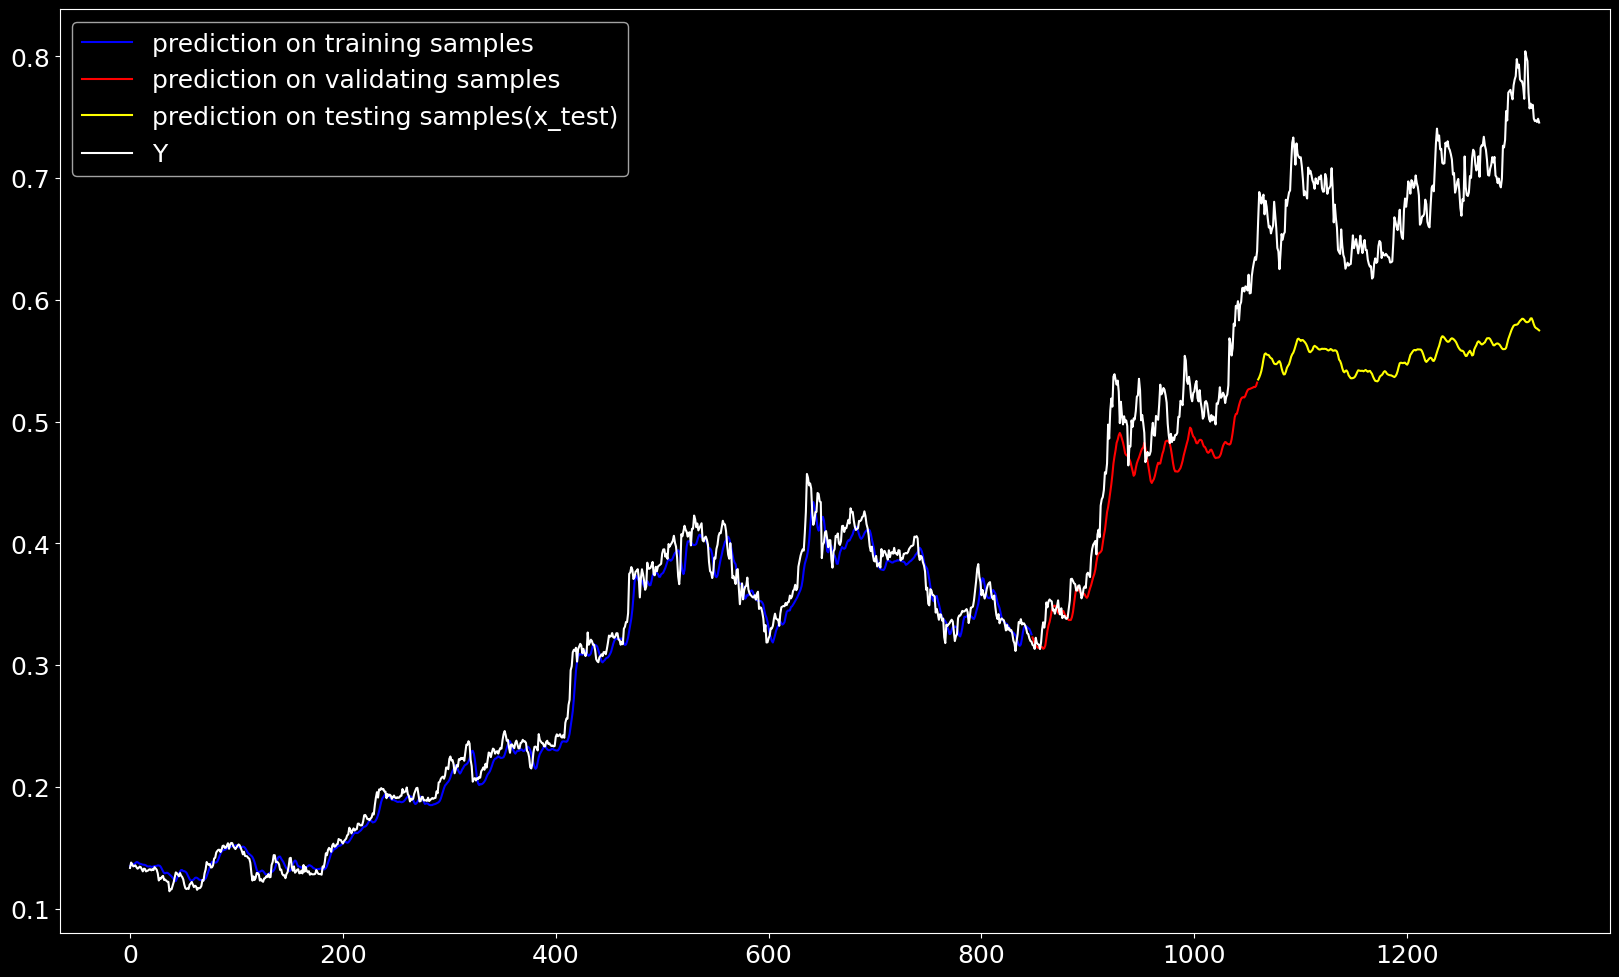

In [34]:
Y = np.concatenate((y_train,y_test),axis = 0)
P = np.concatenate((p1,p),axis = 0)
#plotting the complete Y set with predicted values on x_train and x_test(variable p1 & p respectively given above)
#for
plt.plot(P[:848],color='blue', label='prediction on training samples')
#for validating samples
z = np.array(range(848,1060))
plt.plot(z,P[848:1060],color = 'red',label ='prediction on validating samples')
#for testing samples
x = np.array(range(1060,1325))
plt.plot(x,P[1060:],color = 'yellow',label ='prediction on testing samples(x_test)')

plt.plot(Y,color='white', label='Y')
plt.legend(loc='upper left')
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

it generate a line plot that shows the actual values (Y) and predicted values (P) for your entire dataset, with different colors indicating the different subsets of data (training, validating, testing). This can provide a comprehensive view of how well your model's predictions align with the actual data across the entire dataset.